<a href="https://colab.research.google.com/github/wieeem/MNIST_ANN-from-scratch/blob/main/Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import glob
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd /content/drive/My\ Drive/Colab\ notebook/TP_DL

/content/drive/My Drive/Colab notebook/TP_DL


# Import labels with Pandas


In [22]:
#Fonctionnalités de la bibliothèque: des outils pour lire et écrire des données structurées en mémoire depuis et vers différents formats : fichiers CSV, Microsoft Excel, ...
labels = pd.read_csv('./Classes.csv', sep=';')
print (labels)
# Dictionnaire contenant les noms des labels
label_dict=labels.columns
labels.head(10)

      desert  mountains  sea  sunset  trees
0          1          0    0       0      0
1          1          0    0       0      0
2          1          0    0       0      0
3          1          1    0       0      0
4          1          0    0       0      0
...      ...        ...  ...     ...    ...
1995       0          0    0       0      1
1996       0          0    0       0      1
1997       0          0    0       0      1
1998       0          0    0       0      1
1999       0          0    0       0      1

[2000 rows x 5 columns]


,desert,mountains,sea,sunset,trees
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,1,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,1,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,1,0,0,0


In [23]:
labels=labels.values
print (labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [24]:
label_dict

Index(['desert', 'mountains', 'sea', 'sunset', 'trees'], dtype='object')

#  Read Images

In [25]:
path = 'nature/'
image_glob = glob.glob(path + "/" + "*.jpg")
print(image_glob)
img_dict = {}

def get_id(filename):
    index_s = filename.rfind("/") + 1
    index_f = filename.rfind(".jpg")
    return filename[index_s:index_f]

for fn in image_glob:
        img_dict[get_id(fn)] =Image.open(fn)

def show_img(id):
    print(id)
    plt.imshow(img_dict[id])

['nature/1412.jpg', 'nature/1419.jpg', 'nature/1404.jpg', 'nature/1377.jpg', 'nature/1378.jpg', 'nature/1398.jpg', 'nature/1403.jpg', 'nature/1382.jpg', 'nature/1389.jpg', 'nature/1379.jpg', 'nature/1415.jpg', 'nature/1421.jpg', 'nature/1424.jpg', 'nature/1408.jpg', 'nature/1422.jpg', 'nature/1417.jpg', 'nature/1384.jpg', 'nature/1387.jpg', 'nature/1423.jpg', 'nature/1418.jpg', 'nature/1397.jpg', 'nature/1393.jpg', 'nature/1402.jpg', 'nature/1395.jpg', 'nature/1468.jpg', 'nature/1466.jpg', 'nature/1572.jpg', 'nature/1514.jpg', 'nature/1539.jpg', 'nature/1484.jpg', 'nature/1559.jpg', 'nature/1481.jpg', 'nature/1525.jpg', 'nature/1473.jpg', 'nature/1471.jpg', 'nature/1489.jpg', 'nature/1430.jpg', 'nature/1486.jpg', 'nature/1431.jpg', 'nature/1534.jpg', 'nature/1518.jpg', 'nature/1541.jpg', 'nature/1494.jpg', 'nature/1478.jpg', 'nature/1513.jpg', 'nature/1562.jpg', 'nature/1542.jpg', 'nature/1425.jpg', 'nature/1491.jpg', 'nature/1509.jpg', 'nature/1449.jpg', 'nature/1535.jpg', 'nature/149

1997


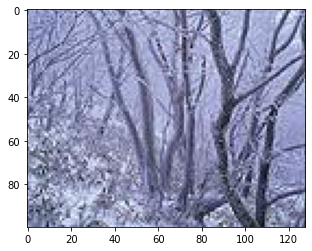

In [34]:
show_img('1997')

#  Data Preparation

In [27]:
def preprocess(img, size=(48, 48)):
    img = img.resize (size, Image.ANTIALIAS) 
    img = np.asanyarray(img) 
    return img

def prepare_data(img_dict,labels, size):
    print("Génération du dataset...")
    dataset = []
    ids = []
    y = []

    for k in img_dict:
            img = preprocess(img_dict[k], size)
            dataset.append(img)
            ids.append(k)
            y.append(labels[int(k)-1])
    print("Exécution OK")
    return dataset,ids,y



# Execution

In [46]:
s = (48, 48)
dataset,ids,y =  prepare_data(img_dict,labels, size=s)

Génération du dataset...
Exécution OK


### To display the first image in  the  dataset, with its labels





1412
1412
[0 0 0 1 1]
Index(['sunset', 'trees'], dtype='object')


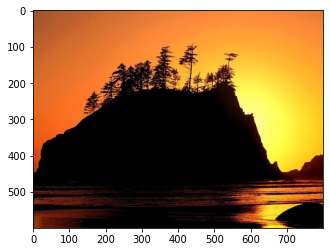

In [39]:
show_img(ids[0])
print(ids[0])
print(y[0])
print(label_dict[y[0]==1])

### Transformation of images and labels to numpy arrays

In [40]:
#Numpy est une extension du langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
images=np.array(dataset)
Y=np.array(y)

In [41]:
print(images.shape)
print(Y.shape)

(2000, 48, 48, 3)
(2000, 5)


#  Deep Learning

###  Import Libraries





In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

###  Parameters 

In [44]:
batch_size = 128 # chaque 128 images on fait un backpropagation
epochs = 5
# dimensions des images
img_rows, img_cols = 48, 48
input_shape = (img_rows, img_cols, 3)

### Split data to  train and test sets

In [48]:
from sklearn.model_selection import train_test_split
indices = np.arange(images.shape[0])

x_train, x_test, y_train, y_test,indices_train,indices_test = train_test_split(images, Y,indices, test_size=0.25, random_state=1)

### Learning

In [49]:
num_classes=labels.shape[1]
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #activation
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (1500, 48, 48, 3)
1500 train samples
500 test samples
Epoch 1/5
12/12 [==============================] - 13s 1s/step - loss: 39.7251 - accuracy: 0.2584 - val_loss: 0.5392 - val_accuracy: 0.4040
Epoch 2/5
12/12 [==============================] - 12s 1s/step - loss: 0.5618 - accuracy: 0.3770 - val_loss: 0.4961 - val_accuracy: 0.4720
Epoch 3/5
12/12 [==============================] - 12s 1s/step - loss: 0.4760 - accuracy: 0.5076 - val_loss: 0.4570 - val_accuracy: 0.5360
Epoch 4/5
12/12 [==============================] - 12s 996ms/step - loss: 0.4036 - accuracy: 0.5585 - val_loss: 0.4386 - val_accuracy: 0.5480
Epoch 5/5
12/12 [==============================] - 12s 995ms/step - loss: 0.3408 - accuracy: 0.6584 - val_loss: 0.4391 - val_accuracy: 0.5440
Test loss: 0.43912434577941895
Test accuracy: 0.5440000295639038


### Prediction 

In [51]:
print(num_classes)
pred=model.predict(x_test)

5


### Show results on one sample image

In [52]:
def show_example(idx):
    N_true = int(np.sum(y_test[idx]))
    print(ids[indices_test[idx]])
    show_img(ids[indices_test[idx]])
    print("Prediction: {}".format("|".join(["{} ({:.3})".format(label_dict[s],
                                                                pred[idx][s])
                                            for s in pred[idx].argsort()[-N_true:][::-1]])))
    print("Réél: {}".format(label_dict[y_test[idx]==1]))

1095
1095
Prediction: desert (0.525)
Réél: Index(['sea'], dtype='object')


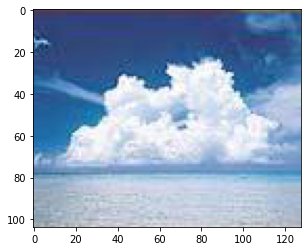

In [55]:
show_example(100)